In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('austin_weather.csv')

In [3]:
df.head(3)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Month'] = df['Date'].dt.month

In [8]:
df.head(2)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Month
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",12
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,29.87,10,10,5,16,6,25,0,,12


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   object        
 5   DewPointAvgF                1319 non-null   object        
 6   DewPointLowF                1319 non-null   object        
 7   HumidityHighPercent         1317 non-null   float64       
 8   HumidityAvgPercent          1319 non-null   object        
 9   HumidityLowPercent          1317 non-null   float64       
 10  SeaLevelPressureHighInches  1319 non-null   object        
 11  SeaLevelPressureAvgInches   1319 non-null   object      

### How do temperatures fluctuate over the course of the year?

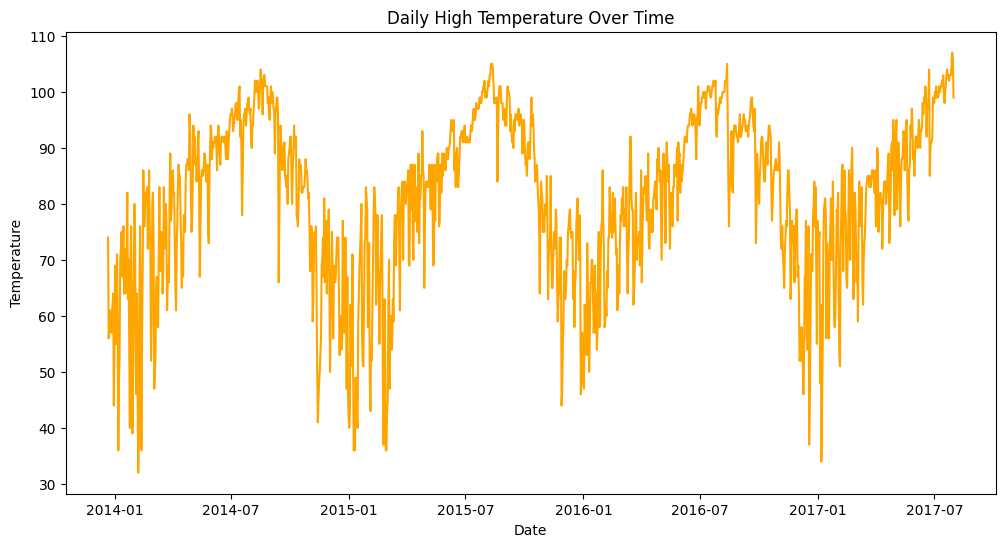

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['TempHighF'], color='orange')
plt.title('Daily High Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### What is the distribution of daily maximum temperatures throughout the year?

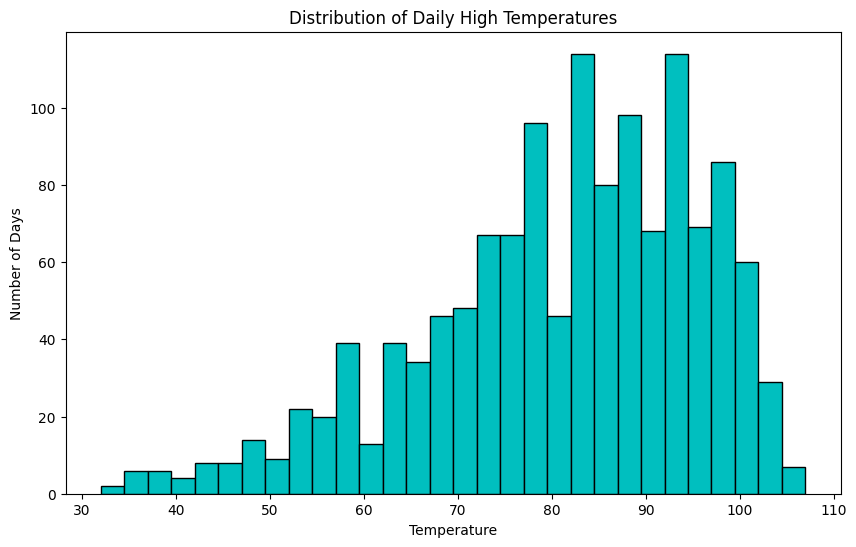

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['TempHighF'], bins=30, color='c', edgecolor='black')
plt.title('Distribution of Daily High Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Number of Days')
plt.show()

In [55]:
numeric_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
                   'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches',
                   'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
                   'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
                   'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']

# Replace non-numeric characters and convert to appropriate numeric types
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('T', '0').replace('-', '0').replace(' ', ''), errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   int64         
 5   DewPointAvgF                1319 non-null   int64         
 6   DewPointLowF                1319 non-null   int64         
 7   HumidityHighPercent         1317 non-null   float64       
 8   HumidityAvgPercent          1319 non-null   int64         
 9   HumidityLowPercent          1317 non-null   float64       
 10  SeaLevelPressureHighInches  1319 non-null   float64       
 11  SeaLevelPressureAvgInches   1319 non-null   float64     

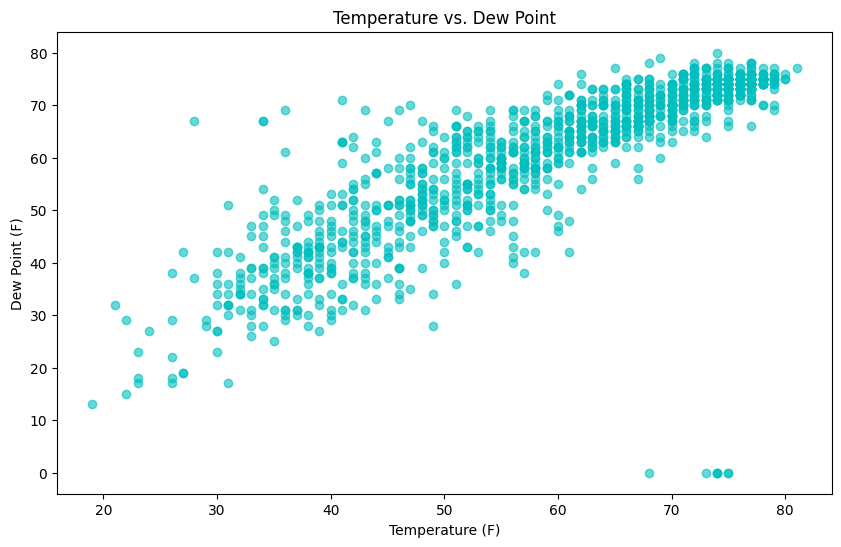

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TempLowF'], df['DewPointHighF'], color='c', alpha=0.6)
plt.title('Temperature vs. Dew Point')
plt.xlabel('Temperature (F)')
plt.ylabel('Dew Point (F)')
plt.show()

In [63]:
weather_counts = df['Events'].value_counts()

In [64]:
weather_counts

Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

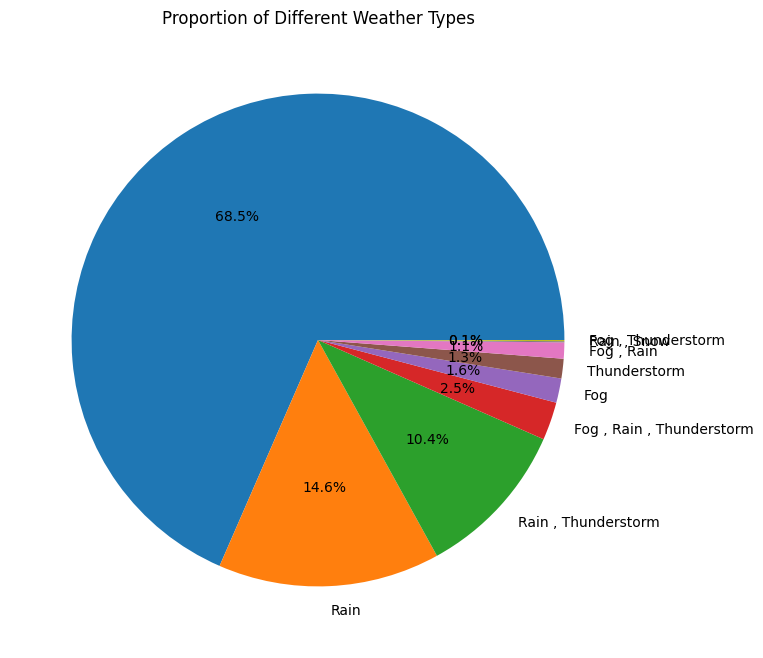

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Different Weather Types')
plt.show()

In [ ]:
monthly_avg_temp = df.groupby('Month')['TempHighF'].mean()

In [67]:
monthly_avg_temp

Month
1     63.137097
2     68.849558
3     73.943548
4     80.933333
5     85.024194
6     92.116667
7     97.806452
8     97.322581
9     92.677778
10    86.118280
11    70.611111
12    64.298077
Name: TempHighF, dtype: float64

### How does the average high temperature vary across different months?

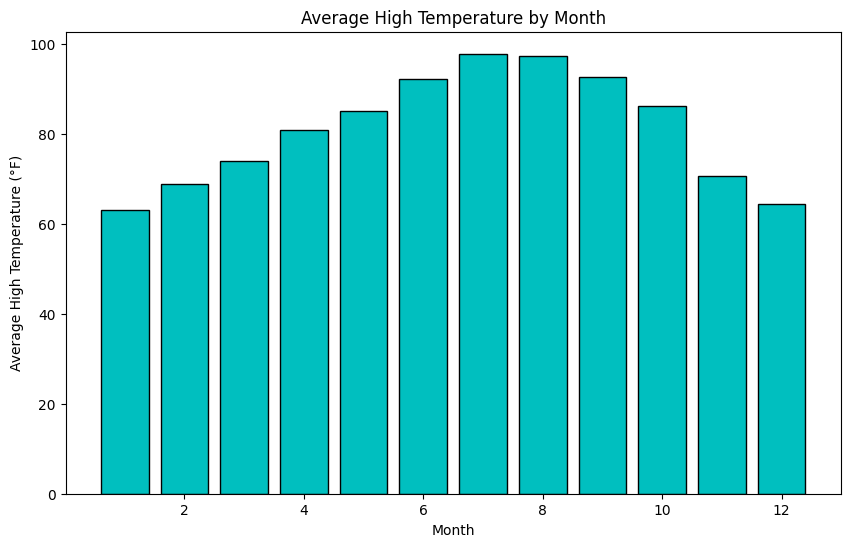

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_temp.index, monthly_avg_temp, color='c', edgecolor='black')
plt.title('Average High Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average High Temperature (°F)')
# plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### How does humidity vary across different months?

<Figure size 1000x600 with 0 Axes>

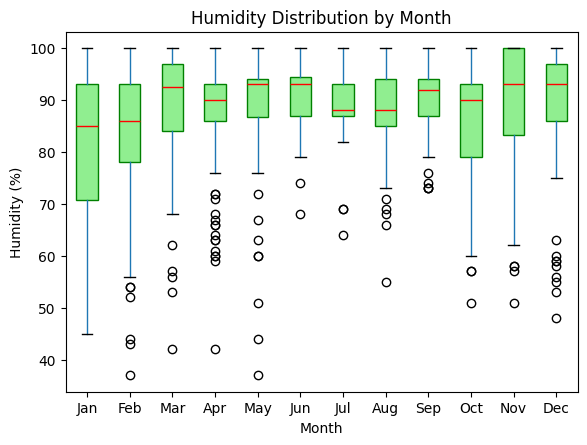

In [74]:
plt.figure(figsize=(10, 6))
df.boxplot(column='HumidityHighPercent', by='Month', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='green'),
           medianprops=dict(color='red'))
plt.title('Humidity Distribution by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()